#**Evidencia 2. Análisis de Aprendizaje Automático**

Víctor Emiliano Chávez Ortega | A01710270

Mayahuetl Medina Chanes | A01276295

Montserrat Ramírez Olguín | A01276161

Yibriham Ali Iñiguez Arteaga | A01540614

Rodrigo Esparza Salas | A01705841




---




##**Documentación del Contexto y Datos**



---



###**Contexto del Negocio**

LogiMayab es la unidad logística encargada de gestionar la operación de transporte terrestre para el grupo Bepensa, operando una flota diversificada que cubre múltiples rutas, regiones y clientes. Su funcional principal es garantizar el desplazamiento eficiente de mercancías, insumos y productos terminados entre centros de distribución, plantas y clientes.

Actualmente, la operación enfrenta retos derivados del crecimiento de la demanda, la variabilidad en patrones de uso de la flota y la complejidad operativa relacionada con mantenimientos, tiempos muertos, fallas mecánicas y un uso no óptimo de unidades. A pesar de que cuentan con un gran volumen de datos históricos, estos no han sido aprovechados de la forma más óptima posible como herramientas analíticas predictivas, lo que limita la capacidad de anticipación de la operación.

Como consecuencia, la toma de decisiones relacionadas con asignación de unidades, planeación de rutas y gestión de capacidad opera principalmente de forma reactiva. Esto genera ineficiencias como baja disponibilidad operativa, incremento de viajes vacíos, aumento en costos de operación y una mayor contratación de de servicios externos de transporte en periodos críticos para poder cumplir con las órdenes recibidas.

Particularmente, la operación presenta una alta proporción de viajes vacíos o con baja ocupación de carga, lo cual representa una ineficiencia directa en el aprovechamiento de los recursos disponibles. Sumado a la reacción reactiva, esto genera desperdicio de capacidad instalada, incremento en costos por kilómetro recorrido, mayor consumo de combustible y menor rentabilidad por viaje.

De esta forma, el uso de técnicas de Machine Learning resulta clave para transformar los datos históricos en insumos predictivos y prescriptivos que permitan identificar patrones ocultos, anticipar comportamientos operativos y proponer esquemas de asignación más eficientes, reduciendo significativamente los viajes vacíos y mejorando el desempeño global de la operación logística.

###**Problema Logístico**



**Problemática**: Problema de desbalance de flota y baja eficiencia en viajes de retorno.

**Problema Logistico Central**:
Las unidades regresan vacías, se desaprovecha capacidad y se incrementan los costos operativos por mala asignación de rutas y falta de sincronización entre oferta y demanda de carga.

**Nuestra perspectiva:** El problema específico abordado es la ausencia de una metodología analítica que permita asignar de manera óptima las unidades de transporte a las rutas disponibles, con el objetivo de minimizar la proporción de viajes vacíos en periodos futuros.

**Impactos de la problemática:**

*   El nivel de utilización real de la flota.
*   El costo operativo por kilómetro recorrido.
*   El consumo de combustible.
*   El desgaste acelerado de las unidades.
*   La capacidad de respuesta ante la demanda futura.

**¿Por qué es importante resolverla?:** Permitiría mejorar la productividad logística, reducir costos operativos estructurales y fortalecer la competitividad del sistema de transporte mediante decisiones basadas en datos.







###**Pregunta analítica del proyecto**

Con base en el problema identificado, se plantea la siguiente pregunta que guía la modelación:

*¿Cuál es la asignación óptima de rutas y unidades para minimizar la proporción de viajes vacíos en los próximos periodos?*

###**Objetivo del modelo**

Desarrollar modelos de Machine Learning que permitan determinar la asignación óptima entre rutas y unidades para minimizar la proporción de viajes vacíos y maximizar la eficiencia operativa de la flota.

###**Objetivos específicos**
*   Identificar patrones históricos de utilización de flota.
*   Modelar la relación entre tipo de ruta, tipo de unidad y nivel de carga.
*   Detectar perfiles operativos de rutas y unidades.



###**Evaluación Inicial de los Datos**

El proyecto se desarrolla a partir de datos operativos históricos del sistema logístico de LogiMayab, los cuales incluyen registros de viaje, sus volumenes de carga, rutas, caracteristicas de las unidades, distancia y horas recorridas y algunos costos asociados.

*Durante la inspección preliminar se identificaron:*

*   Valores faltantes en registros de operación.
*   Columnas totalmente vacías en el dataframe.
*   Registros duplicados.
*   Valores atípicos.

*Los datos incluyen variables:*
*   Numéricas: Numero, folio, Peso Kgs, Subtotal, Nro Ope, etc.
*   Categórigas: Nombre de cliente, ruta, viaje, sucursal, etc.
*   Temporales: Fecha.1,

*Las variables consideradas críticas para el análisis son:*
*   Ruta
*   Unidad/Numero
*   Peso Kgs
*   Sucursal

En este sentido, debido a la naturaleza y calidad de los datos, se requiere aplicar procesos de limpieza, normalización y transformación antes de utilizar los modelos de aprendizaje automático.





##**Preprocesamiento de Datos**



---



Es necesario mencionar, que la base de datos que utilizaremos recibe el nombre de ```Reporte Listado Viajes Ene-Oct'25```. Sin mebargo, este fue renombrado a ```viajes``` para la simplificación de su nombre.



In [ ]:
#Cargar archivos
import pandas as pd
viajes = pd.read_excel('/content/viajes.xlsx')
viajes

,Numero,Nombre Cliente,Folio,Ruta,Viaje,Viaje Docto,Sucursal,No. Viaje Cte,Fecha,Moneda,...,Nro Ope,Operador,Fecha Salida,Fecha Llegada,Peso Kgs,Peso Descarga Kgs,Diferencia,Documentos,UUID CP,Estatus de Viaje
0,1,EMBOTELLADORAS BEPENSA,105,BB PACABTUN/BB CIUDAD DEL CARMEN,LM/MID-000001659,CARTA PORTE CFDI 000000001659-CPMID,MERIDA/YUC001,6919,2025-01-01 00:00:00,PESOS,...,3798.0,GAMBOA FIERRO ALEJANDRO,2025-01-01 18:50:00,2025-01-02 05:17:00,54000.000,NaN,54000.0,NaN,NaN,TERMINADO
1,1,EMBOTELLADORAS BEPENSA,105,BB CIUDAD DEL CARMEN/BB PACABTUN,LM/MID-000001659,CARTA PORTE CFDI 000000001659-CPMID,MERIDA/YUC001,6919,2025-01-01 00:00:00,PESOS,...,3798.0,GAMBOA FIERRO ALEJANDRO,2025-01-02 09:30:00,2025-01-02 16:41:00,54000.000,NaN,54000.0,NaN,NaN,TERMINADO
2,1,EMBOTELLADORAS BEPENSA,199,BB PACABTUN/BB CAMPECHE OTE,LM/MID-000001661,CARTA PORTE CFDI 000000001661-CPMID,MERIDA/YUC001,5717,2025-01-01 00:00:00,PESOS,...,58816.0,CASTILLO DIAZ OMAR SALVADOR,2025-01-02 00:35:00,2025-01-02 03:02:00,54000.000,NaN,54000.0,NaN,NaN,TERMINADO
3,1,EMBOTELLADORAS BEPENSA,199,BB CAMPECHE OTE/BB PACABTUN,LM/MID-000001661,CARTA PORTE CFDI 000000001661-CPMID,MERIDA/YUC001,5717,2025-01-01 00:00:00,PESOS,...,58816.0,CASTILLO DIAZ OMAR SALVADOR,2025-01-02 03:50:00,2025-01-02 06:21:00,54000.000,NaN,54000.0,NaN,NaN,TERMINADO
4,1,EMBOTELLADORAS BEPENSA,204,BB PACABTUN/BB PLAYA DEL CARMEN,LM/MID-000001660,CARTA PORTE CFDI 000000001660-CPMID,MERIDA/YUC001,5716,2025-01-01 00:00:00,PESOS,...,1334.0,DIAZ ECHEVERRIA ALEJANDRO DE JESUS,2025-01-01 23:20:00,2025-01-02 09:30:00,54000.000,NaN,54000.0,NaN,NaN,TERMINADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108986,1322,NUEVA WAL MART DE MEXICO,2178,WM CEDIS GUADALAJARA/BKHL BONAFONT,LM/MIDCG-000011717,CARTA PORTE 000000005220-VYUC,MERIDA CG/YUC007,IDID22495550,2025-10-27 00:00:00,PESOS,...,58257.0,PEREZ PALACIOS GABRIEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108987,1322,NUEVA WAL MART DE MEXICO,2217,CEDIS PERECEDEROS VHS/WM SANTA FE,LM/ARR-000012440,CARTA PORTE CFDI 000000004382-CPVHS,CARDARRAS/TAB005,R6295,2025-10-27 00:00:00,PESOS,...,58213.0,DE LA ROSA SOBERANO DAVID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108988,1322,NUEVA WAL MART DE MEXICO,2367,MATTEL DE MEXICO/CEDIS WM MID TEYA,LM/MIDCG-000011723,CARTA PORTE CFDI 000000006500-CPYUC,MERIDA CG/YUC007,8700197,2025-10-27 00:00:00,PESOS,...,45028.0,ZETINA UC JOSE DE LA CRUZ,NaN,NaN,50837.837,50837.837,NaN,NaN,NaN,FACTURADO
108989,1587,LA MADRILEÑA,2289,"LA MADRILEÑA, SAN JUAN DEL RIO/IZTAPALAPA, DIS...",LM/QRO-000001595,CARTA PORTE CFDI 000000001592-CPQRO,QUERETARO/QRO003,MADOLE021014,2025-10-27 00:00:00,PESOS,...,58902.0,TAMANIZ AMADOR MARTIN,NaN,NaN,20000.000,20000.000,NaN,NaN,NaN,FACTURADO


1. Eliminación de columnas completamente vacías o irrelevantes para nuestro análisis

In [ ]:
cols_drop = [
    "Documentos",
    "UUID CP",
    "Numero",
    "Folio",
    "Viaje Docto",
    "Factura",
    "Liquidación",
    "Fecha Vencimiento",
    "Peso Descarga Kgs",
    "Diferencia"
]
viajes = viajes.drop(columns=cols_drop, errors="ignore")

2. Convertir a fechas

In [ ]:
date_cols = ["Fecha", "Fecha Salida", "Fecha Llegada"]
for c in date_cols:
    viajes[c] = pd.to_datetime(viajes[c], errors="coerce")

3. Tratamiento de nulos

In [ ]:
#Borrar registros si no tiene ni salida ni llegada
viajes = viajes.dropna(subset=["Fecha Salida", "Fecha Llegada"], how="all")

#Imputación de fecha de llegada

#Duración de viaje
duracion = viajes["Fecha Llegada"] - viajes["Fecha Salida"]

# Mediana por Ruta
mediana_ruta = duracion.groupby(viajes["Ruta"]).transform("median")

#Mediana global
mediana_global = duracion.median()

#Imputa cuando hay salida pero no llegada
mask = viajes["Fecha Llegada"].isna() & viajes["Fecha Salida"].notna()
viajes.loc[mask, "Fecha Llegada"] = viajes.loc[mask, "Fecha Salida"] + mediana_ruta

#Si aún queda alguno, usa mediana global
mask2 = viajes["Fecha Llegada"].isna() & viajes["Fecha Salida"].notna()
viajes.loc[mask2, "Fecha Llegada"] = viajes.loc[mask2, "Fecha Salida"] + mediana_global

#Imputación de fecha de salida

mask3 = viajes["Fecha Salida"].isna() & viajes["Fecha Llegada"].notna()
viajes.loc[mask3, "Fecha Salida"] = viajes.loc[mask3, "Fecha Llegada"] - mediana_global

#Eliminar
viajes = viajes.dropna(subset=["Fecha Salida", "Fecha Llegada"])


#Imputar Fecha.1
viajes["Fecha.1"] = viajes["Fecha.1"].fillna(viajes["Fecha"])
viajes["Fecha.1"] = viajes["Fecha.1"].fillna(viajes["Fecha Salida"])
viajes["Fecha.1"] = viajes["Fecha.1"].fillna(viajes["Fecha Llegada"])


#Garantizar que la llegada no sea antes que la salida
viajes = viajes[viajes["Fecha Llegada"] >= viajes["Fecha Salida"]]

#Crear la columna de duración horas
viajes["Duración_horas"] = (
    (viajes["Fecha Llegada"] - viajes["Fecha Salida"])
    .dt.total_seconds() / 3600
)

In [ ]:
#Imputar variables numéricas
#imputar por Ruta
viajes["Peso Kgs"] = viajes.groupby("Ruta")["Peso Kgs"].transform(
    lambda s: s.fillna(s.median())
)

#imputar los que aún queden con la mediana global
viajes["Peso Kgs"] = viajes["Peso Kgs"].fillna(viajes["Peso Kgs"].median())

In [ ]:
#Imputar Variables categoricas
cat_cols = ["Tractocamión","Remolque 1","Remolque 2","Dolly","Operador"]
for c in cat_cols:
    viajes[c] = viajes[c].fillna("DESCONOCIDO")
viajes["Estatus de Viaje"] = viajes["Estatus de Viaje"].fillna("DESCONOCIDO")

In [ ]:
#verificar que no haya nulos
viajes.isna().sum()

,0
Nombre Cliente,0
Ruta,0
Viaje,0
Sucursal,0
No. Viaje Cte,0
Fecha,0
Moneda,0
SubTotal,0
IVA,0
Retención,0


4. Eliminación de duplicados

In [ ]:
#ver el duplicado
viajes[viajes.duplicated()].head()

,Nombre Cliente,Ruta,Viaje,Sucursal,No. Viaje Cte,Fecha,Moneda,SubTotal,IVA,Retención,...,Remolque 1,Dolly,Remolque 2,Nro Ope,Operador,Fecha Salida,Fecha Llegada,Peso Kgs,Estatus de Viaje,Duración_horas
2291,NUEVA WAL MART DE MEXICO,WM CEDIS MID TEYA/WM CANCUN LABNA,LM/MIDCG-000001839,MERIDA CG/YUC007,20432484,2025-01-06,PESOS,3600.88,576.14,144.03,...,925970,D795,733,58917.0,AREVALO CAUICH MARTIN ALEXIS,2025-01-06 01:00:00,2025-01-06 07:00:00,7606.954,TERMINADO,6.0


In [ ]:
#borrar el duplicado
viajes = viajes.drop_duplicates()

5. Archivo final tratado


In [ ]:
#Guardar en excel el archivo
viajes.to_excel("ViajesFinal.xlsx", index=False)

##**Función para métricas obligatorias**

(En este caso y dada la naturaleza del problema no son necesarias, sin embargo, son colocadas)



---



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def calcular_metricas_regresion(y_true, y_pred_continuo, k):

    #RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred_continuo))

    #R²
    r2 = r2_score(y_true, y_pred_continuo)

    #R² ajustada: 1 - (1-R²)(n-1)/(n-k-1)
    n = len(y_true)
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    return rmse, r2, r2_adj

##**Implementación de Modelos Seleccionados**



---



Es necesario mencionar que en la base de datos, los pesos van de 1kg a 869899.484kg, no hay 0.

La métrica correcta para medir esto es:

```Utilización = Peso transportado / Capacidad del vehículo```

Sin embargo, en este caso no se tiene la capacidad por unidad, por lo que se usará una aproximación robusta. En donde se define a un **viaje vacío a aquellos viajes con peso dentro del percentil 10 inferior de carga histórica.**


###**Primer Modelo - XGBoost**

* Target - 'viaje vacío'.
* Umbral `Peso Kgs`: aquellos viajes con peso dentro del percentil 10 inferior de carga histórica.

In [ ]:
#Construcción de variable viaje_vacio

#Percentil 10 por ruta
threshold = viajes.groupby("Ruta")["Peso Kgs"].transform(lambda x: x.quantile(0.10))

#Indicador binario
viajes["viaje_vacio"] = (viajes["Peso Kgs"] < threshold).astype(int) #viaje vacío (1), viaje con carga (0)

display(viajes['viaje_vacio'].value_counts())

,count
viaje_vacio,
0,79159
1,3701


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Identificar columnas categóricas y numéricas
categorical_cols = viajes.select_dtypes(include=['object']).columns.tolist()
numerical_cols = viajes.select_dtypes(include=np.number).columns.tolist()

#Excluir target
if 'viaje_vacio' in numerical_cols:
    numerical_cols.remove('viaje_vacio')
if 'Peso Kgs' in numerical_cols:
    numerical_cols.remove('Peso Kgs')

#Features
features = numerical_cols + categorical_cols

X = viajes[features].copy()
y = viajes['viaje_vacio']

#Codificación de etiquetas para variables categóricas
for col in categorical_cols:
    le = LabelEncoder()
    #Convertir a string para asegurar que todos los formatos sean iguales
    X[col] = X[col].astype(str)
    X[col] = le.fit_transform(X[col])


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_val:", X_val.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_val:", y_val.shape)

Dimensiones de X_train: (66288, 18)
Dimensiones de X_val: (16572, 18)
Dimensiones de y_train: (66288,)
Dimensiones de y_val: (16572,)


####**Implementar XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# XGBoost
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predicciones
y_pred = xgb_model.predict(X_val)
y_pred_proba = xgb_model.predict_proba(X_val)[:, 1] # Probabilidades para la clase positiva

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:22:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


####**Evaluación**

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("Matriz de Confusión:", conf_matrix)
print("Reporte de Clasificación:", class_report)

Accuracy: 0.9602944726043929
Matriz de Confusión: [[15799    33]
 [  625   115]]
Reporte de Clasificación:               precision    recall  f1-score   support

           0       0.96      1.00      0.98     15832
           1       0.78      0.16      0.26       740

    accuracy                           0.96     16572
   macro avg       0.87      0.58      0.62     16572
weighted avg       0.95      0.96      0.95     16572



####**Métricas obligatorias**

In [ ]:
#Llamar a la función
k_xgb = X_train.shape[1]

rmse_xgb, r2_xgb, r2_adj_xgb = calcular_metricas_regresion(
    y_true=y_val,
    y_pred_continuo=y_pred_proba,
    k=k_xgb
)

print(f"RMSE: {rmse_xgb:.2f}")
print(f"R²: {r2_xgb:.2f}")
print(f"R² ajustada: {r2_adj_xgb:.2f}")

RMSE: 0.18
R²: 0.21
R² ajustada: 0.21


####**Visualizaciones**

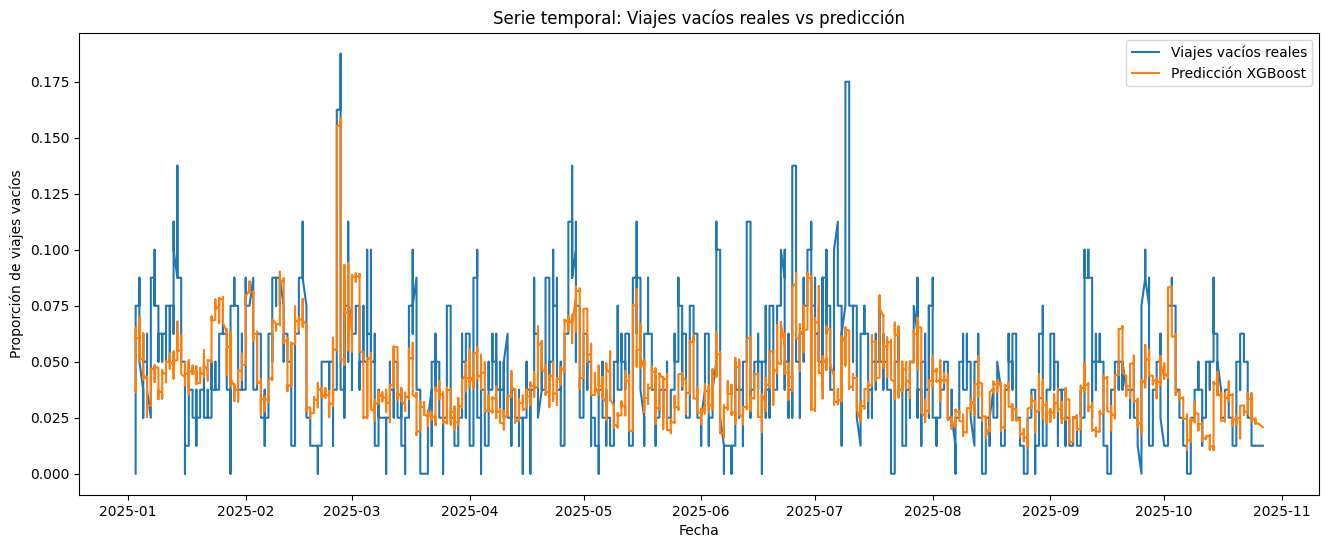

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Predicciones sólo en validación
y_pred = xgb_model.predict(X_val)
y_pred_proba = xgb_model.predict_proba(X_val)[:,1]
viajes.loc[X_val.index, 'pred_prob'] = y_pred_proba
viajes.loc[X_val.index, 'pred'] = y_pred

#Formato de la fecha
viajes['Fecha'] = pd.to_datetime(viajes['Fecha'])

#Filtrar solo validación para hacer las gráficas
plot_data = viajes.loc[X_val.index].sort_values("Fecha")

#Reducir ruido
plot_data['real_smooth'] = plot_data['viaje_vacio'].rolling(80).mean()
plot_data['pred_smooth'] = plot_data['pred_prob'].rolling(80).mean()

#Serie temporal vs predicción
plt.figure(figsize=(16,6))
plt.plot(plot_data['Fecha'], plot_data['real_smooth'], label="Viajes vacíos reales")
plt.plot(plot_data['Fecha'], plot_data['pred_smooth'], label="Predicción XGBoost")
plt.title("Serie temporal: Viajes vacíos reales vs predicción")
plt.xlabel("Fecha")
plt.ylabel("Proporción de viajes vacíos")
plt.legend()
plt.show()

**Interpretación:**
La gráfica muestra que el modelo captura de manera adecuada la tendencia general de la proporción de viajes vacíos, ya que la predicción sigue de cerca el comportamiento real, sin embargo, el modelo suaviza los valores extremos (mientras los datos reales presentan picos y caídas abruptas, la predicción se mantiene en un rango más estable), lo cual indica que el modelo aprende el patrón del sistema, pero no los eventos atípicos del día a día. Aun así, identifica correctamente los periodos donde la proporción tiende a aumentar o disminuir, lo cual es útil para la planeación y gestión de capacidad.

/tmp/ipython-input-1073209016.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


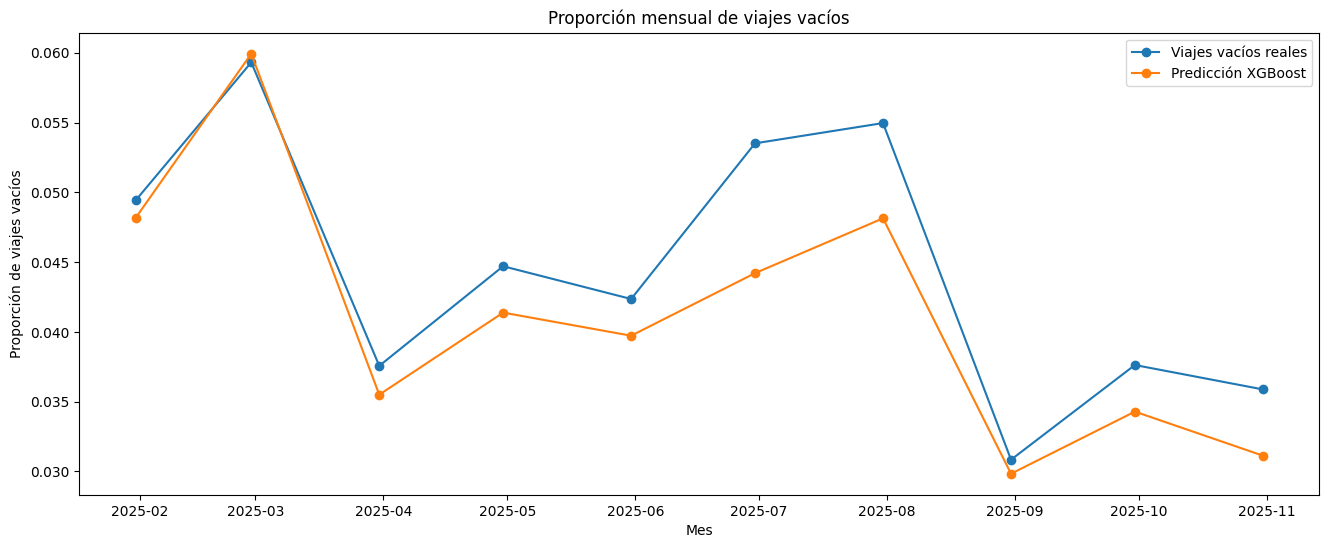

In [ ]:
#Ver la gráfica por meses

# Asegurar que Fecha es datetime
plot_data['Fecha'] = pd.to_datetime(plot_data['Fecha'])

#Resample SOLO columnas numéricas necesarias
monthly = (
    plot_data
    .set_index('Fecha')[['viaje_vacio', 'pred_prob']]
    .resample('M')
    .mean()
)

# Gráfica mensual
plt.figure(figsize=(16,6))
plt.plot(monthly.index, monthly['viaje_vacio'], marker='o', label="Viajes vacíos reales")
plt.plot(monthly.index, monthly['pred_prob'], marker='o', label="Predicción XGBoost")
plt.title("Proporción mensual de viajes vacíos")
plt.xlabel("Mes")
plt.ylabel("Proporción de viajes vacíos")
plt.legend()
plt.show()


**Interpretación:**
La gráfica muestra la proporción mensual de viajes vacíos y compara los valores reales con las predicciones del modelo XGBoost. En términos generales, el modelo reproduce correctamente la forma del ciclo mensual, siguiendo los aumentos y disminuciones observados en los datos reales. En meses como febrero, marzo y agosto, la predicción está muy alineada con el comportamiento real, lo que indica una buena capacidad del modelo para capturar tendencias estacionales. Sin embargo, como se menciono anteriormente el modelo tiende a suavizar los extremos, especialmente en meses donde la proporción real cae abruptamente, como septiembre. En resumen, la predicción mensual es estable y útil para monitorear tendencias operativas, permitiendo anticipar meses con mayor riesgo de viajes vacíos.

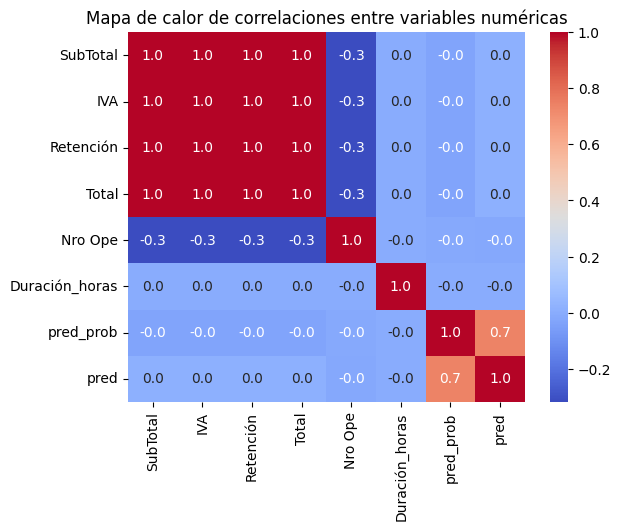

In [ ]:
#Mapa
numerical_cols_corr = viajes.select_dtypes(include='number').columns.tolist()
numerical_cols_corr = [col for col in numerical_cols_corr if col not in ['viaje_vacio', 'Peso Kgs']]

corr = viajes[numerical_cols_corr].corr()

plt.figure()
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.show()

**Interpretación:**
El mapa de calor muestra que existe una correlación perfecta entre SubTotal, IVA, Retención y Total, lo cual indica multicolinealidad: estas variables contienen esencialmente la misma información y no aportan valor adicional al modelo. Por otro lado, variables operativas como Duración_horas muestran correlaciones cercanas a cero con las variables financieras, lo que sugiere independencia entre duración del viaje y el monto facturado.

###**Segundo Modelo - Random Forest Classifier**

In [ ]:
##Construcción de variable “Viaje Vacío”

#Percentil 10 por ruta
threshold = viajes.groupby("Ruta")["Peso Kgs"].transform(lambda x: x.quantile(0.10))

#Indicador binario
viajes["ViajeVacio"] = (viajes["Peso Kgs"] < threshold).astype(int) #viaje vacío (1), viaje con carga (0)

In [ ]:
#extraer el número de semana del año de la fecha de salida
viajes["Semana"] = viajes["Fecha Salida"].dt.isocalendar().week.astype(int)
#extraer el mes
viajes["Mes"] = viajes["Fecha Salida"].dt.month

In [ ]:
#Peso promedio histórico por ruta
viajes["Peso_prom_ruta"] = viajes.groupby("Ruta")["Peso Kgs"].transform("mean")

In [ ]:
#dataset del modelo
features = [
    "Ruta",
    "Nombre Cliente",
    "Tractocamión",
    "Duración_horas",
    "Peso_prom_ruta",
    "Semana",
    "Mes"
] #son todas las xolumnas que se usarán como variables explicativas
data_modelo = viajes[features + ["ViajeVacio"]].dropna()

In [ ]:
##Hacer una copia antes del encoding para después recuperar Ruta y Tractocamión
data_modelo_original = data_modelo.copy()

In [ ]:
#codificacion: convertir las columnas categóricas en variables binarias
data_modelo_encoded = pd.get_dummies(
    data_modelo,
    columns=["Ruta", "Nombre Cliente", "Tractocamión"],
    drop_first=True
)

In [ ]:
#separar en entrenamiento y prueba

X = data_modelo_encoded.drop(columns=["ViajeVacio"]) #todas las variables explicativas menor target
y = data_modelo_encoded["ViajeVacio"] #target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)

####**Implementar RFC**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(
    n_estimators=200, #no. de arboles
    max_depth=12, #profundidad
    random_state=42,
    class_weight="balanced" #balancearlas
)

modelo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       random_state=42)

####**Evaluación**

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = modelo.predict(X_test) #Predecir la clase de prueba
y_prob = modelo.predict_proba(X_test)[:,1] #tomar la probabibilidad de que cada viaje sea vacío

print(classification_report(y_test, y_pred)) #para mostrar precisión, recall y F1
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     19790
           1       0.09      0.68      0.16       925

    accuracy                           0.68     20715
   macro avg       0.53      0.68      0.48     20715
weighted avg       0.94      0.68      0.77     20715

ROC AUC: 0.737469128552504


####**Visualizaciones**

In [ ]:
#ranking ruta-unidad
ranking = pd.DataFrame(index=X_test.index)
ranking["Prob_vacio"] = y_prob

ranking["Ruta"] = data_modelo_original.loc[X_test.index, "Ruta"]
ranking["Unidad"] = data_modelo_original.loc[X_test.index, "Tractocamión"]

ranking = ranking[["Ruta", "Unidad", "Prob_vacio"]]
ranking.sort_values("Prob_vacio", ascending=False).head(10)

,Ruta,Unidad,Prob_vacio
5191,IEQSA/DIST ARCACONTAL INSURGENTES,T638,0.633088
1225,IEQSA/PROPIMEX APIZACO,T638,0.628043
9743,IEQSA/DIST ARCACONTAL GUADALUPE,T477,0.626259
217,EMB MARGARITAS PACHUCA/IEQSA,T638,0.625221
5189,IEQSA/DIST ARCACONTAL AGS COYOTES,T682,0.623669
4740,DIST ARCA CONT CD JUAREZ/IEQSA,T638,0.623566
6001,IEQSA/PROPIMEX MEGA MORELIA,T638,0.622825
2545,IEQSA/DIST ARCACONTAL FUNDADORES,T638,0.620061
4107,DIST ARCACONTAL FUNDADORES/IEQSA,T638,0.619523
12489,IEQSA/BEBIENDO COLIMA,T477,0.618624


**Interpretación:**

Esta tabla muestra las combinaciones más peligrosas de la operación (donde más se pierde dinero).

Cada fila responde a la pregunta: Si hoy asigno esta unidad a esta ruta… ¿qué tan probable es que el viaje salga vacío?

En el caso de la primer fila ```IEQSA/DIST ARCACONTAL INSURGENTES – T638 → 0.633```, significa que en condiciones similares a las observadas históricamente, esta combinación tiene 63% de probabilidad de quedar sin carga.

En general, la tabla revela que:

*   El tractocamión T638 aparece 7 veces en el top 10, indicando que es una unidad sistémicamente mal asignada.
*   Rutas como: IEQSA/DIST ARCACONTAL INSURGENTES, IEQSA/PROPIMEX tienen fallas internas de sincronización entre oferta y demanda de retorno.

In [ ]:
#Asignación óptima automática de rutas-unidades

#generar predicción sobre todo el dataset
X_all = data_modelo_encoded.drop(columns=["ViajeVacio"])

probs_all = modelo.predict_proba(X_all)[:,1] #estimar la probabilidad futura de viaje vacío

In [ ]:
#tabla completa de riesgo
tabla_riesgo = data_modelo_original.copy()
tabla_riesgo["Prob_vacio"] = probs_all

tabla_riesgo = tabla_riesgo[["Ruta", "Tractocamión", "Prob_vacio"]]

In [ ]:
#Calcular riesgo promedio por combinación
riesgo_mean = tabla_riesgo.groupby(
    ["Ruta", "Tractocamión"]
)["Prob_vacio"].mean().reset_index()

In [ ]:
#Asigna a cada ruta la unidad con menor riesgo esperado.
asignacion_optima = riesgo_mean.loc[
    riesgo_mean.groupby("Ruta")["Prob_vacio"].idxmin() #Para cada ruta se encuentra el índice de la unidad con menor riesgo
].sort_values("Prob_vacio") #menor a mayor riesgo

asignacion_optima.head(15)

,Ruta,Tractocamión,Prob_vacio
1623,BB CENTRO/BB PACABTUN,T541,0.282404
2853,BB PACABTUN/BB CENTRO,T541,0.307403
1624,BB CENTRO/BB PONIENTE,T541,0.326354
2483,BB IZAMAL/BB PONIENTE,T620,0.343081
3492,BB PACABTUN/BB PROGRESO,T709,0.343809
4375,BB PROGRESO/BB PACABTUN,T709,0.345751
4112,BB PONIENTE/BB CENTRO,T541,0.349785
1164,BB CANCUN PLANTA/BB PLAYA DEL CARMEN,T757,0.350066
2428,BB IZAMAL/BB PACABTUN,T620,0.354231
2610,BB MOTUL/BB PACABTUN,T620,0.355982


**Interpretación:**

Esta tabla muestra las mejores combinaciones para operar, diciendo: Para esta ruta, esta es la unidad que menor riesgo tiene de quedarse vacía.

Respondiendo a la siguiente pregunta: Si quiero minimizar viajes vacíos… ¿qué unidad conviene asignar a cada ruta?, mostrando así, la mejor pareja posible por ruta, según el modelo.

En este caso analizando los patrones históricos de ```BB CENTRO / BB PACABTUN — T541 → 0.28``` vemos que asignar la T541 a esta ruta genera una probabilidad de vacío de solo 28%.



In [ ]:
asignaciones = asignacion_optima.copy() #crear copia de asignacion_optima
usadas = set() #conjunto vacio

resultado_final = []

for _, fila in asignaciones.iterrows(): #recorrer filas de asignaciones
    ruta = fila["Ruta"] #guardar nombre de la ruta
    unidad = fila["Tractocamión"] #guardar la unidad que el modelo propone para esa ruta

    if unidad not in usadas: #verificar si la unidad ya fue asigmada a otra ruta
        resultado_final.append(fila) #si no ha sido asignada guardarla
        usadas.add(unidad)
    else: #si la unidad ya está ocupada
        alternativas = riesgo_mean[
            (riesgo_mean["Ruta"] == ruta) & #quitar unidades ya asignadas
            (~riesgo_mean["Tractocamión"].isin(usadas))
        ].sort_values("Prob_vacio")

        if not alternativas.empty:
            nueva = alternativas.iloc[0]
            resultado_final.append(nueva)
            usadas.add(nueva["Tractocamión"])
        else:
            resultado_final.append(fila)

resultado_final = pd.DataFrame(resultado_final)
resultado_final.sort_values("Prob_vacio").head(40)

,Ruta,Tractocamión,Prob_vacio
1623,BB CENTRO/BB PACABTUN,T541,0.282404
1624,BB CENTRO/BB PONIENTE,T541,0.326354
2483,BB IZAMAL/BB PONIENTE,T620,0.343081
3492,BB PACABTUN/BB PROGRESO,T709,0.343809
4112,BB PONIENTE/BB CENTRO,T541,0.349785
1164,BB CANCUN PLANTA/BB PLAYA DEL CARMEN,T757,0.350066
4363,BB PROGRESO/BB PACABTUN,T598,0.363769
3412,BB PACABTUN/BB PLAYA DEL CARMEN,T777,0.364722
12003,TULUM/BB PLAYA DEL CARMEN,T806,0.365822
931,BB CANCUN PLANTA/BB COZUMEL,T628,0.371048


**Interpretación:**

Este algoritmo asigna los camiones a las rutas de forma inteligente, asegurando que cada camión solo sea usado en una ruta a la vez.

Si dos rutas quieren usar el mismo camión, el sistema elige automáticamente la mejor opción posible para una de ellas y busca una buena alternativa para la otra, tratando siempre de reducir el riesgo de que el viaje salga vacío.

Es así que el sistema toma decisiones usando datos históricos, eligiendo la combinación de rutas y camiones que en conjunto genera menos viajes vacíos y menos costo.

Por ejemplo:
*   El sistema detecta que:
    *   La ruta Cancún → Playa del Carmen
    *   Y la ruta Mérida → Chetumal

    quieren usar el camión T541, porque es el más eficiente para ambas. Sin embargo, como no puede estar en dos lugares a la vez:
    *   El sistema asigna T541 a la ruta donde más se aprovecha
    *   A la otra ruta le asigna el segundo mejor camión disponible

Otro ejemplo:


*   Si el modelo ve que:
    *   El camión T620 tiene baja probabilidad de ir vacío en rutas cortas
    *   Pero alto riesgo en rutas largas
    Entonces:
    *   Lo asigna a rutas cortas.
    *   Lo evita en rutas largas aunque “siempre lo hayan usado ahí”










In [ ]:
# Riesgo promedio histórico por ruta (como opera hoy)
riesgo_actual = tabla_riesgo.groupby("Ruta")["Prob_vacio"].mean().reset_index()
riesgo_actual.columns = ["Ruta", "Riesgo_actual"]

# Riesgo propuesto (óptimo)
riesgo_optimo = resultado_final[["Ruta","Prob_vacio"]]
riesgo_optimo.columns = ["Ruta","Riesgo_optimo"]

# Unir
comparacion = riesgo_actual.merge(riesgo_optimo, on="Ruta")

# Calcular mejora real
comparacion["Mejora"] = (comparacion["Riesgo_actual"] - comparacion["Riesgo_optimo"]) * 100

# Ranking de impacto
comparacion.sort_values("Mejora", ascending=False).head(10)

,Ruta,Riesgo_actual,Riesgo_optimo,Mejora
201,BB IZAMAL/BB PONIENTE,0.392080,0.343081,4.899868
1045,IEQSA/DIST ARCACONTAL VENADILLO,0.594425,0.551039,4.338519
926,DIST ARCACONTAL FUNDADORES/IEQSA,0.596611,0.554496,4.211476
1797,WM CANCUN POLIGONO SUR/SUPER CENTER CANCUN II,0.586376,0.544981,4.139509
948,DIST ARCACONTAL VENADILLO/IEQSA,0.592016,0.550805,4.121110
1112,LOGI BASE MERIDA/MEGA EMPACK,0.478919,0.438768,4.015077
1028,IEQSA/DIST ARCACONTAL FUNDADORES,0.595850,0.556403,3.944780
1054,IEQSA/PROPIMEX CELAYA,0.587737,0.550599,3.713795
910,DIST ARCACONTAL ALAMO/IEQSA,0.589173,0.552555,3.661809
298,BEBIENDO COLIMA/IEQSA,0.591168,0.554837,3.633071


**Interpretación:**

Esta tabla compara cómo se opera hoy y cómo operaría el sistema usando tu modelo.

| Columna           | Qué significa                                                          |
| ----------------- | ---------------------------------------------------------------------- |
| **Ruta**          | Ruta analizada                                                         |
| **Riesgo_actual** | Probabilidad promedio histórica de que esa ruta tenga viajes vacíos    |
| **Riesgo_optimo** | Probabilidad estimada si se aplica la asignación que propone el modelo |
| **Mejora**        | Cuántos puntos porcentuales se reduce el riesgo                        |


Ejemplo 1: BB IZAMAL / BB PONIENTE
*   Antes: 39.2% de viajes vacíos
*   Con el modelo: 34.3%
*   Mejora: 4.9%

¿Qué significa?

En esta ruta, si LogiMayab sigue operando igual seguirá desperdiciando casi 4 de cada 10 viajes.
Con este sistema, se perderían solo 3.4 de cada 10.


Ejemplo 2: DIST ARCACONTAL FUNDADORES / IEQSA
*   Antes: 59.66% desperdicio
*   Con el modelo: 55.45%
*   Mejora: 4.21%


Aunque una reducción de 4% suene pequeña, en logística significa:

Si esa ruta tiene por ejemplo:

1,000 viajes al año

Una mejora del 4% son 40 viajes menos vacíos al año solo en una ruta .

Con:

*   Combustible

*   Mantenimiento

*   Tiempo de operador

*   Desgaste de unidad

Que al ser multiplícalo por las 10 rutas de la tabla significaría un ahorro operativo serio.


In [ ]:
#Identificar unidades problematicas
tabla_riesgo.groupby("Tractocamión")["Prob_vacio"].mean().sort_values(ascending=False).head(10)

,Prob_vacio
Tractocamión,
T638,0.588415
T600,0.578086
T601,0.571988
T684,0.571601
T477,0.569174
T566,0.569108
T545,0.568767
T634,0.566272
T682,0.565766


In [ ]:
#Identifiar rutas críticas
tabla_riesgo.groupby("Ruta")["Prob_vacio"].mean().sort_values(ascending=False).head(10)

,Prob_vacio
Ruta,
DIST ARCACONTAL GUADALUPE/IEQSA,0.632353
PROPIMEX PACIFICO/IEQSA,0.630233
IEQSA/PROPIMEX APIZACO,0.628043
IEQSA/PROPIMEX PACIFICO,0.624763
PROPIMEX APIZACO/IEQSA,0.624398
IEQSA/PROPIMEX MEGA MORELIA,0.623379
IEQSA/DIST ARCACONTAL GUADALUPE,0.619773
DIST ARCACONTAL SAN LUIS/IEQSA,0.617370
DIST ARCACONTAL SAN RAFAEL/IEQSA,0.615862


In [ ]:
mejora_global = (comparacion["Mejora"].mean()) * 100
print("Mejora promedio real:", mejora_global)

Mejora promedio real: 63.24834904679489


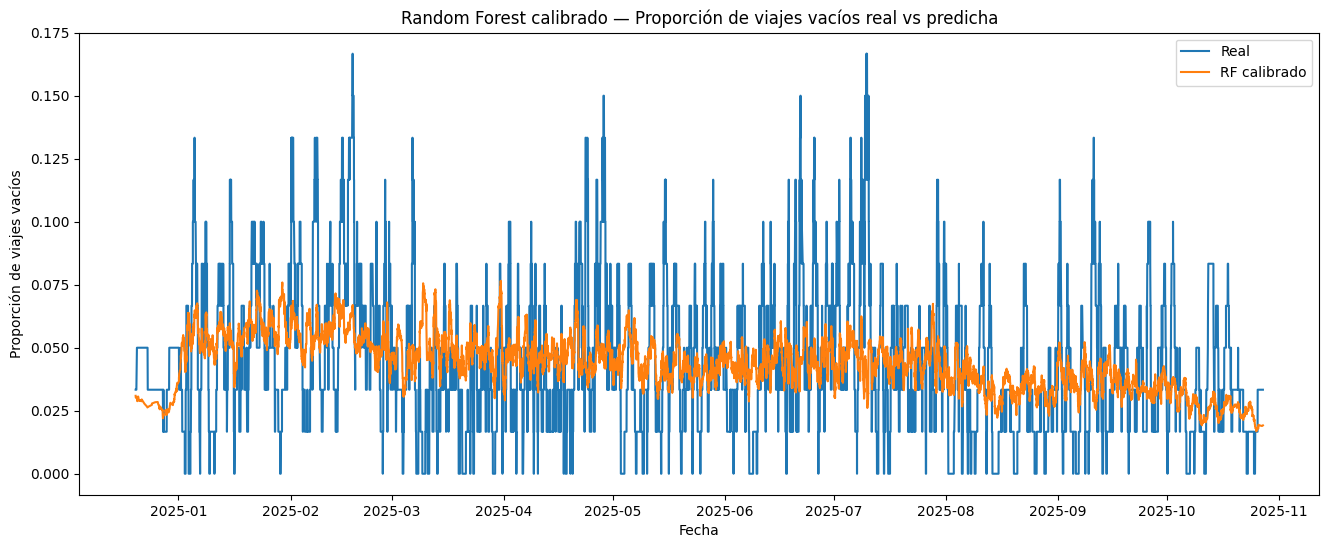

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt

rf_cal = CalibratedClassifierCV(modelo, method='isotonic', cv=3)
rf_cal.fit(X_train, y_train)

y_prob_cal = rf_cal.predict_proba(X_test)[:,1]
viajes.loc[X_test.index, 'prob_RF_cal'] = y_prob_cal

plot_data = viajes.loc[X_test.index].sort_values("Fecha Salida")

plot_data['real_smooth'] = plot_data['ViajeVacio'].rolling(60).mean()
plot_data['pred_smooth'] = plot_data['prob_RF_cal'].rolling(60).mean()

plt.figure(figsize=(16,6))
plt.plot(plot_data['Fecha Salida'], plot_data['real_smooth'], label="Real")
plt.plot(plot_data['Fecha Salida'], plot_data['pred_smooth'], label="RF calibrado")
plt.title("Random Forest calibrado — Proporción de viajes vacíos real vs predicha")
plt.xlabel("Fecha")
plt.ylabel("Proporción de viajes vacíos")
plt.legend()
plt.show()

**Interpretación:**

En esta gráfica, se puede observar que la serie naranja (que es la predicción y lo que random forest cree que va a pasar) sigue la tendencia de la serie real, que es el color azul. A pesar de que no captura cada pico extremo, sí captura los cambios estructurales en el riesgo, así como temporadas de mayor y menor proporción de viajes vacíos.

Podemos ver que la línea azul sube y baja constantemente, indicando que el porcentaje de viajes vacíos no es estable, es un problema dinámico que cambia según las rutas, clientes, temporada y asignación de unidades.

Aunque la línea naranja no copia exactamente cada punto, sí sigue la forma general de la azul, subiendo y bajando cuando el problema mejora o empeora. Por lo que el modelo sí está entendiendo la tendencia real de la operación.


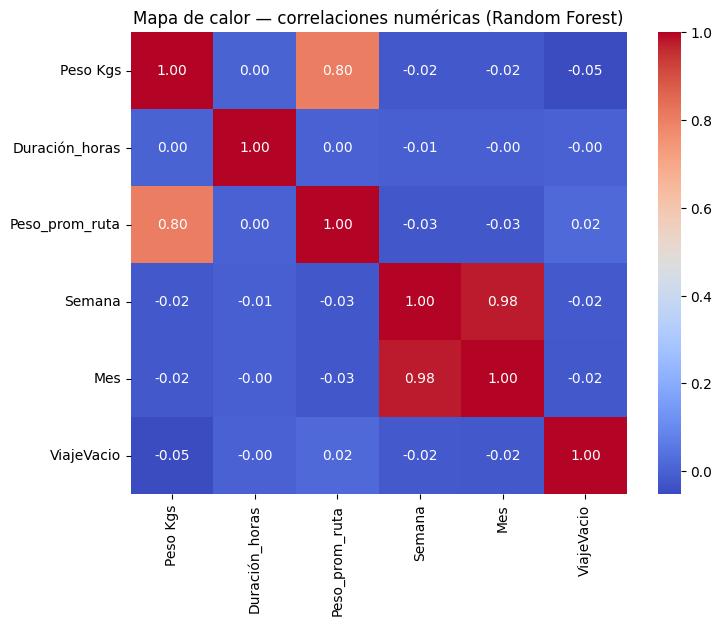

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#heatmao
num_cols = [
    "Peso Kgs",
    "Duración_horas",
    "Peso_prom_ruta",
    "Semana",
    "Mes"
]
num_cols = [c for c in num_cols if c in viajes.columns]  # seguridad

corr = viajes[num_cols + ["ViajeVacio"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de calor — correlaciones numéricas (Random Forest)")
plt.show()

**Interpretación:**

El heatmap muestra una relación fuerte Peso Kgs y Peso_prom_ruta (0.80), indicando que las rutas que históricamente han cargado más peso, siguen cargando más. Igualmente, podemos ver una gran relación entre las variables de tiempo como Semana y Mes.

También podemos ver que la variable “Viaje Vacío” no presenta correlación fuerte con ninguna variable individual, lo que demuestra que este problema no depende de una sola variable. Indicando, que la ocurrencia de viajes vacíos surge de interacciones complejas entre múltiples factores y no puede explicarse simplemente por el peso, la ruta o la estacionalidad. Esto justificael uso de modelos no lineales como Random Forest, capaces de capturar relaciones ocultas que los métodos tradicionales no detectan.

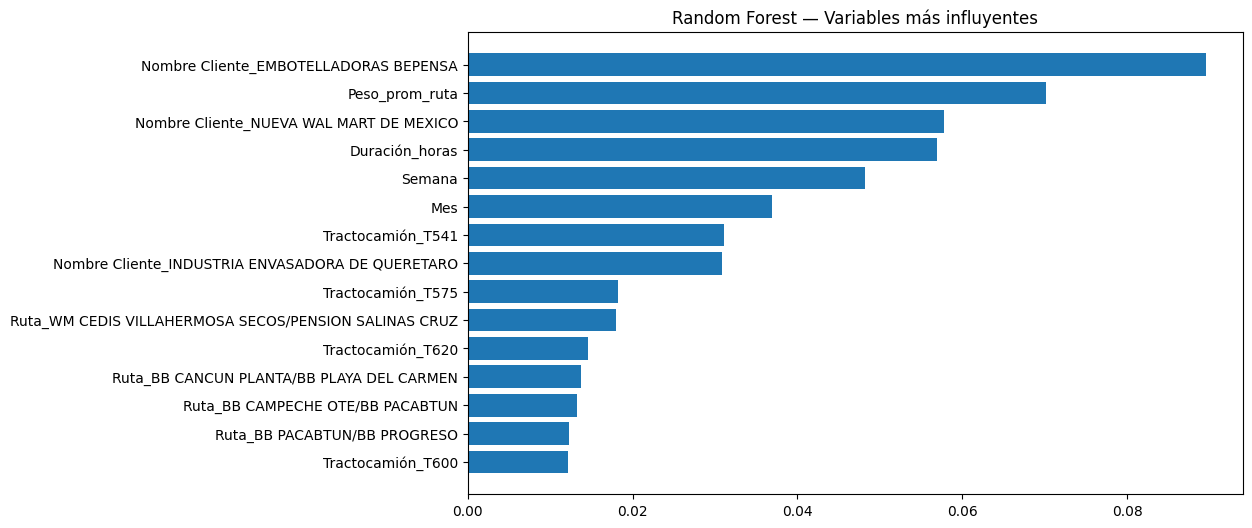

In [ ]:
#Top 15 de variables
importances = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": modelo.feature_importances_
}).sort_values("Importancia", ascending=False).head(15)

plt.figure(figsize=(10,6))
plt.barh(importances["Variable"], importances["Importancia"])
plt.title("Random Forest — Variables más influyentes")
plt.gca().invert_yaxis()
plt.show()

**Interpretación:**

Esta gráfica muestra qué variables influyen en que ocurra un viaje vacío (cuanto más larga la barra, hay una mayor influencia en la probabilidad de viaje vacío).

En este caso:

*   Cuando el modelo ve que el viaje es para EMBOTELLADORAS BEPENSA, ya tiene una ventaja enorme para decidir si ese viaje tendrá riesgo de vacío
*   Peso_prom_ruta, el modelo distingue rutas que siempre cargan pesado, ligero o que mezclan cargas. Por ejemplo, si una ruta históricamente transporta poco peso, es más probable que genere viajes vacíos.
*   Cliente NUEVA WAL MART DE MÉXICO, al igual que Bepensa, es un cliente cuyo patrón logístico es muy determinante.
*   Duración_horas indica que entre más larga la ruta, hay más riesgo de vacío, pues hay más incertidumbre en el retorno, no hay carga cercana.
*   Semana y Mes indica que el viaje vacío no es contante a lo largo del año, pues hay temporadas con exceso o baja de demanda, meses fuertes, semanas pico, etc.
*   En cuanto a los tractocamiones como T541, T575, T620, T600, el modelo está diciendo que estas unidades aparece repetidamente en viajes vacíos, implicando una mala asignación de estos.
*   Respecto a las rutas mencionadas, el modelo indica que esas rutas son estructuralmente más riesgosas, indicando que históricamente no han tenido retorno con carga.

####**Métricas obligatorias**

In [ ]:
k_rf = X_train.shape[1]  #número de predictores en RF

rmse_rf, r2_rf, r2_adj_rf = calcular_metricas_regresion(
    y_true=y_test,
    y_pred_continuo=y_prob,  #prob RF sin calibrar
    k=k_rf
)

print("Random Forest sin calibrar:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")
print(f"R² ajustada: {r2_adj_rf:.2f}")
print()

rmse_rf_cal, r2_rf_cal, r2_adj_rf_cal = calcular_metricas_regresion(
    y_true=y_test,
    y_pred_continuo=y_prob_cal,
    k=k_rf
)

print("Random Forest calibrado")
print(f"RMSE: {rmse_rf_cal:.2f}")
print(f"R²: {r2_rf_cal:.2f}")
print(f"R² ajustada: {r2_adj_rf_cal:.2f}")

Random Forest sin calibrar:
RMSE: 0.47
R²: -4.23
R² ajustada: -4.99

Random Forest calibrado
RMSE: 0.20
R²: 0.04
R² ajustada: -0.10


##**Evaluación Comparativa**



---



En esta sección se evalúa el desempeño de los modelos XGBoost y Random Forest desde dos perspectivas complementarias:
*   Estadística: calidad de predicción continua del riesgo.
*   Operativa: capacidad de ordenar y seleccionar rutas–unidades de menor riesgo.

La evaluación se apoya en métricas numéricas obligatorias (RMSE, R² ajustada, AUC) y en visualizaciones comparativas (curve ROC y boxplot de separación de clases).

###**Comparación cuantitativa de métricas**

La siguiente tabla resume el desempeño numérico de ambos modelos:

In [ ]:
#Tabla comparativa de métricas

resultados_modelos = pd.DataFrame([
    {
        "Modelo": "XGBoost (clasificador)",
        "Conjunto": "Validación",
        "Accuracy / AUC": accuracy,
        "Tipo métrica": "Accuracy",
        "RMSE": rmse_xgb,
        "R²": r2_xgb,
        "R² ajustada": r2_adj_xgb
    },
    {
        "Modelo": "Random Forest",
        "Conjunto": "Prueba",
        "Accuracy / AUC": roc_auc_score(y_test, y_prob),
        "Tipo métrica": "ROC AUC",
        "RMSE": rmse_rf,
        "R²": r2_rf,
        "R² ajustada": r2_adj_rf
    },
    {
        "Modelo": "Random Forest calibrado",
        "Conjunto": "Prueba",
        "Accuracy / AUC": roc_auc_score(y_test, y_prob_cal),
        "Tipo métrica": "ROC AUC (calibrado)",
        "RMSE": rmse_rf_cal,
        "R²": r2_rf_cal,
        "R² ajustada": r2_adj_rf_cal
    }
])

display(resultados_modelos)

,Modelo,Conjunto,Accuracy / AUC,Tipo métrica,RMSE,R²,R² ajustada
0,XGBoost (clasificador),Validación,0.960294,Accuracy,0.183460,0.211024,0.210166
1,Random Forest,Prueba,0.737469,ROC AUC,0.472452,-4.232363,-4.991662
2,Random Forest calibrado,Prueba,0.740439,ROC AUC (calibrado),0.202464,0.039099,-0.100343


Los resultados evidencian diferencias claras:

* XGBoost presenta el menor RMSE y el mayor valor de R², lo que indica mejor ajuste en la estimación de probabilidades.

* Random Forest sin calibrar presenta R² negativo, lo que implica que su ajuste continuo es peor que una predicción promedio constante.

* Random Forest calibrado mejora significativamente respecto al modelo original, aunque sigue siendo inferior a XGBoost.

En términos estrictamente estadísticos, XGBoost es superior al ofrecer predicciones más consistentes, estables y cercanas al comportamiento real del sistema.

###**Comparación ROC**

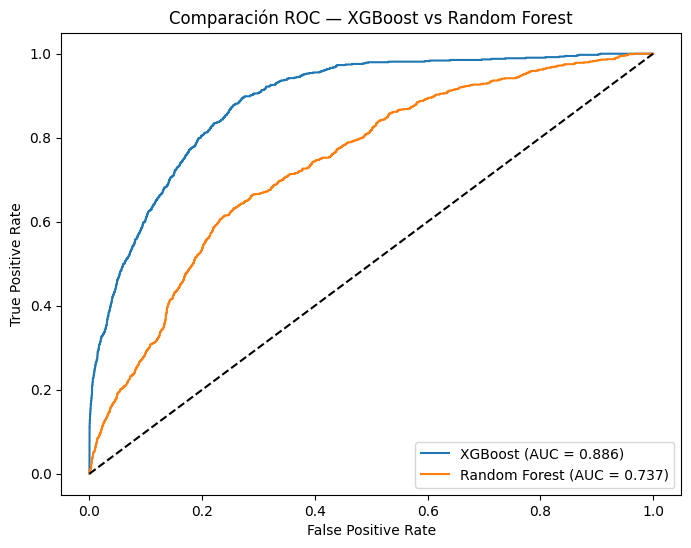

In [ ]:
 #Curva ROC para comparación entre modelos
from sklearn.metrics import roc_curve, auc

#Curva ROC XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_pred_proba)
roc_xgb = auc(fpr_xgb, tpr_xgb)

#Curva ROC Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob)
roc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))

plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_xgb:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_rf:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparación ROC — XGBoost vs Random Forest")
plt.legend()
plt.show()

La curva ROC muestra una diferencia significativa:

* XGBoost obtiene un AUC = 0.886, indicando alta capacidad para distinguir viajes vacíos de viajes productivos.

* Random Forest obtiene un AUC ≈ 0.737, reflejando menor poder discriminativo.

Esto implica que XGBoost clasifica mejor los eventos críticos (viajes vacíos) frente a decisiones erróneas, lo que resulta esencial en escenarios con clases desbalanceadas.

Conclusión parcial:

> XGBoost es más confiable cuando el objetivo es detectar riesgo de forma temprana.

###**Separación de Clases**

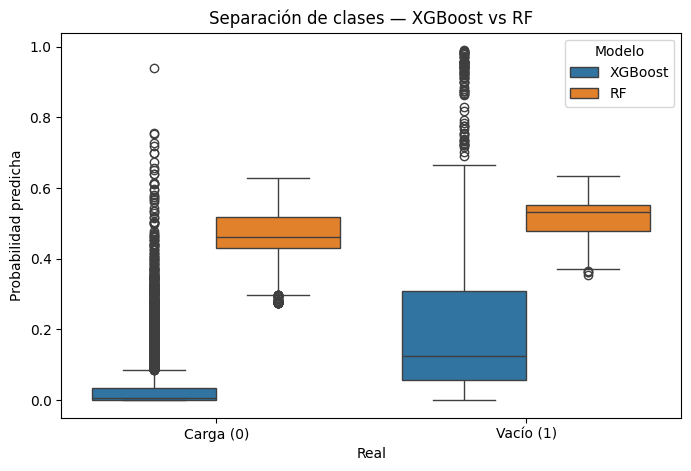

In [ ]:
import seaborn as sns

df = pd.concat([
    pd.DataFrame({"Modelo":"XGBoost","Real":y_val.values,"Pred":y_pred_proba}),
    pd.DataFrame({"Modelo":"RF","Real":y_test.values,"Pred":y_prob})
])

plt.figure(figsize=(8,5))
sns.boxplot(x="Real", y="Pred", hue="Modelo", data=df)
plt.xticks([0,1], ["Carga (0)", "Vacío (1)"])
plt.ylabel("Probabilidad predicha")
plt.title("Separación de clases — XGBoost vs RF")
plt.show()

El boxplot evidencia diferencias estructurales:

* XGBoost asigna probabilidades bajas a viajes con carga y altas a viajes vacíos, mostrando separación clara entre clases.

* Random Forest concentra probabilidades cerca de 0.5 en ambas clases, reflejando indecisión estructural.

Esto indica que XGBoost aprendió la relación real entre carga, duración y riesgo, mientras que RF adopta una postura más conservadora y menos sensible.

##**Conclusiones y Modelo Óptimo**



---



El análisis realizado demuestra que el problema de viajes de retorno vacíos no es un fenómeno aleatorio, sino una consecuencia directa de una asignación ineficiente de unidades, baja anticipación de la demanda y ausencia de una metodología analítica para la toma de decisiones operativas.

A partir del trabajo desarrollado, se evidencia que la incorporación de modelos de Machine Learning permite transformar este problema operativo en una oportunidad de optimización estructural.

Los resultados muestran que XGBoost es el modelo con mejor desempeño estadístico global, al presentar menor error promedio (RMSE), mayor estabilidad (R² ajustada) y mejor capacidad de discriminación (ROC AUC). Esto confirma que es la herramienta más adecuada para anticipar escenarios de riesgo logístico y pronosticar tendencias de viajes improductivos, permitiendo una planeación basada en datos y no en intuición.

Por otro lado, el Random Forest a pesar de no dar probabilidades suficientemente calibradas, sí resulta altamente funcional. Siendo un modelo óptimo porque no solo predijo la probabilidad de viajes vacíos, sino que permitió generar un ranking de riesgo por cada combinación Ruta–Tractocamión, lo cual es muy útil para la asignación óptima de unidades. Esto lo convierte en una herramienta directamente usable por la operación para decidir qué unidad enviar a cada ruta minimizando riesgos y considerando restricciones reales. Además, el modelo reveló patrones operativos importantes e identifico rutas, clientes y unidades problemáticas, así como efectos de la estacionalidad.

Adicionalmente, permitió cuantificar el impacto operativo al estimar la mejora en riesgo de vacío cuando se aplica la asignación óptima frente al comportamiento histórico, en otras palabras impacta directamente la eficiencia, reducción de costos y mayor control operativo.

Finalmente, la salida del Random Forest es más interpretable y accionable, pues responde directamente a preguntas como qué unidad conviene en cada ruta y cuál es el riesgo asociado. Por ello, más que un clasificador preciso, ofrece una solución integral orientada a decisiones reales de logística.


##**Conclusiones individuales**



---



###**Víctor Emiliano Chávez Ortega**

De este reporte principalmente aprendí que los modelos predictivos no solo sirven para estimar probabilidades, sino para transformar operaciones completas cuando se integran al proceso de toma de decisiones. Al elegir nuestro modelo óptimo (Random Forest) no solo consideramos las predicciones, si no también convertir los resultados en rankings de riesgo y asignaciones óptimas, y así el modelo se vuelve una herramienta táctica y estratégica para mejorar la eficiencia; de esta manera podemos aportar un verdadero valor a Bepensa.


###**Mayahuetl Medina Chanes**

Como conclusión puedo decir que el desarrollo del proyecto me ayudó a comprender más acerca de los viajes vacíos y cómo es un problema estructural de las operaciones logisticas, muchas veces ocasionado por la falta de planeación basada en datos, y si no hay una metodología sólida que ayude a la planeación se toman muchas decisiones reactivas que pueden traer muchas consecuencias negativas en la operación y estructura financiera. Pude comprender más las métricas utilizadas, y cómo una métrica alta no necesariamente significa un modelo útil, y depende del problema que estés considerando y el enfoque que estés realizando.

###**Montserrat Ramírez Olguín**
En este proyecto hemos logrado desarrollar nuestras habilidades en el desarrollo de modelos predictivos y el analisis de datos. Fue un reto más que nada para nosotros como equipo el eleigir cual iba a ser nuestro enfoque basandonos en las necesidades del negocio, escoger una hipotesis que nos ayudara a generar un insight accionable y de valor para cubrir estas necesidades. Con la ejecución del modelo al final dada las discuciones en equipo y las instrucciones de la evidencia como equipo decidimos crear dos modelos, en los que estuvimos experimentando con diferentes parametros, para la final buscar obtener la mejor respuesta que podía dar dicho modelo y después elegir cual iba a ser el mejor para la predicción que queremos ofrece a Bepensa. El modelo seleccionado fue XGboost para hacer la predicción de un viaje vacio ya que fue el modelo en el que logramos obtener mejores resultados de hiperparemtros, sin embargo no descartamos el modelo de Random Forest ya que este nos ayuda con la predicción de rutas con viajes vacios y auqnue no obtuvimos resultados tan confiables como con el otro modelos, creemos nos puede brindar un insight importante al momento de optimizar viajes y descubrir la causa raiz o hacer un plan de acción en estas rutas con un alto indice de viajes en vacio.

###**Yibriham Ali Iñiguez Arteaga**

Como conclusion, en mi opinion, el camino tomado fue el mejor debido a que desde la definicion de problematica partimos de la mejor manera definiendo un aproblematica que no esta a la vista dentro de las operaciones de logistica y de planeacion, pues se podria decir que es un problema silencioso pero que es costoso ya que el realizar viajes vacios, unicamente acumulan kilometros que nos afectan en la suma de kilometros de cada unidad lo cual en algun punto se tienen que ir a mantenimiento y no fueron kilometros ni  pagados ni bien aprovechados, es por eso que desde un inicio definimos el poder predecir y visualizar el viaje vacio, para en ves de realizar una planificacion de unidades y acomodo de unidades, unicamente optimizamos sin realizar grandes cambios y asi sea pequeño el cambio, este sera significativo despues de tiempo ya que esos viajes vacios seran aprovechados.

Dicho esto, el modelo seleccionado fue XGboost para predecir si habr aun viaje vacio y debido a los hiperparametros que obtuvimos lo tomamos como bueno, ya que el accuracy es demasiado confiable, mientras que el random forest nos apoya en la optimizaciond e seleccion de rutas y aunque no es perfecto el modelo, son buenos los hiperparametros.


###**Rodrigo Esparza Salas**

El desarrollo de esta evidencia me permitió comprender cómo el análisis de datos y los modelos predictivos pueden convertirse en herramientas reales de apoyo a la toma de decisiones dentro de una operación logística. A lo largo del proyecto entendí que los viajes vacíos no son solo una consecuencia operativa, sino un problema estructural que impacta directamente en los costos, el desgaste de las unidades y la planeación estratégica. También aprendí que no basta con obtener métricas altas; es indispensable interpretar los resultados, validar su utilidad para el negocio y transformarlos en acciones concretas. La comparación entre modelos como XGBoost y Random Forest me ayudó a valorar la importancia de los hiper-parámetros, la precisión y el enfoque del problema. Finalmente, considero que este proyecto fortaleció mis habilidades analíticas y mi visión sobre cómo la predicción puede generar valor real para empresas como Bepensa al optimizar recursos, reducir ineficiencias y mejorar la planeación operativa.

In [ ]:
%%shell
jupyter nbconvert --to html Evidencia_2.ipynb

[NbConvertApp] WARNING | pattern 'Evidencia_2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
   

CalledProcessError: Command 'jupyter nbconvert --to html Evidencia_2.ipynb
' returned non-zero exit status 255.